### Load data

In [1]:
from sklearn import datasets
import pandas as pd
pd.set_option('display.max_columns', None)
import sys
sys.path.append('../../')

breast_cancer = datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
target = pd.Series(breast_cancer.target, name='target').map(
    {0: 'A', 1: 'B'},
)
df = pd.concat([data, target], axis=1)

### Create an Analyzer object

In [2]:
import tabularmagic as analyzer
analyzer = analyzer.Analyzer(df, test_size=0.3, name='Breast cancer sklearn dataset')
analyzer

INFO: Initialization complete. Shapes of train, test DataFrames: (398, 31), 
      (171, 31). 


Breast cancer sklearn dataset 
--------------------------------------------------------------------------------
Train shape: (398, 31)                  Test shape: (171, 31)                   
--------------------------------------------------------------------------------
Categorical variables:
  'target' 
                                                                                
Numerical variables:
  'meanradius', 'meantexture', 'meanperimeter', 'meanarea', 'meansmoothness', 
  'meancompactness', 'meanconcavity', 'meanconcavepoints', 'meansymmetry', 
  'meanfractaldimension', 'radiuserror', 'textureerror', 'perimetererror', 
  'areaerror', 'smoothnesserror', 'compactnesserror', 'concavityerror', 
  'concavepointserror', 'symmetryerror', 'fractaldimensionerror', 'worstradius', 
  'worsttexture', 'worstperimeter', 'worstarea', 'worstsmoothness', 
  'worstcompactness', 'worstconcavity', 'worstconcavepoints', 'worstsymmetry', 
  'worstfractaldimension' 

### Exploratory data analysis

In [3]:
analyzer.eda().categorical_summary_statistics()

,target
Statistic,
n_unique,2
most_common,B
least_common,A
n_missing,0
missing_rate,0.0
n,398


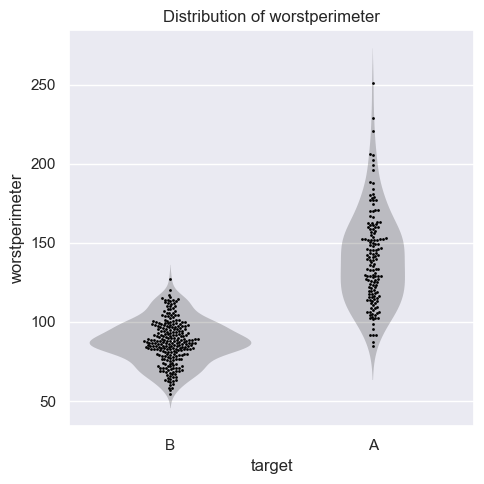

In [4]:
analyzer.eda().plot_distribution_stratified(
    'worstperimeter', 'target', strategy='violin_swarm')

### Preprocess the data

In [5]:
analyzer.datahandler().load_data_checkpoint().\
    force_binary(['target'], pos_labels=['B']).\
    scale(
        include_vars=analyzer.datahandler().numerical_vars(),
        exclude_vars=['B_yn(target)'],
        strategy='standardize'
    ).save_data_checkpoint('finished preprocessing')

INFO: Working DataFrames reset to original DataFrames. Shapes of train, test 
      DataFrames: (398, 31), (171, 31). 
INFO: Forced variables 'target' to binary. Variables renamed to 'B_yn(target)'. 
INFO: Scaled variables 'textureerror', 'areaerror', 'worstsymmetry', 
      'compactnesserror', 'worstconcavepoints', 'meanconcavity', 
      'meanconcavepoints', 'meancompactness', 'worstcompactness', 'worstarea', 
      'concavityerror', 'perimetererror', 'worsttexture', 'radiuserror', 
      'meanfractaldimension', 'worstsmoothness', 'meanarea', 'worstradius', 
      'concavepointserror', 'meantexture', 'meansymmetry', 
      'fractaldimensionerror', 'smoothnesserror', 'meanradius', 'symmetryerror', 
      'worstperimeter', 'worstfractaldimension', 'meansmoothness', 
      'meanperimeter', 'worstconcavity' using strategy standardize. 
INFO: Saved working DataFrames checkpoint finished preprocessing. 


Breast cancer sklearn dataset 
--------------------------------------------------------------------------------
Train shape: (398, 31)                  Test shape: (171, 31)                   
--------------------------------------------------------------------------------
Categorical variables:
  None 
                                                                                
Numerical variables:
  'meanradius', 'meantexture', 'meanperimeter', 'meanarea', 'meansmoothness', 
  'meancompactness', 'meanconcavity', 'meanconcavepoints', 'meansymmetry', 
  'meanfractaldimension', 'radiuserror', 'textureerror', 'perimetererror', 
  'areaerror', 'smoothnesserror', 'compactnesserror', 'concavityerror', 
  'concavepointserror', 'symmetryerror', 'fractaldimensionerror', 'worstradius', 
  'worsttexture', 'worstperimeter', 'worstarea', 'worstsmoothness', 
  'worstcompactness', 'worstconcavity', 'worstconcavepoints', 'worstsymmetry', 
  'worstfractaldimension', 'B_yn(target)' 

In [6]:
analyzer.datahandler().load_data_checkpoint('finished preprocessing')
report = analyzer.ml_classification(
    models=[
        analyzer.ml.LinearC('l1'),
    ],
    y_var='B_yn(target)',
    X_vars=['worstperimeter', 'worstradius', 'worstarea', 'worstconcavity'],
    outer_cv=5
)

INFO: Working DataFrames reset to checkpoint finished preprocessing. Shapes of 
      train, test DataFrames: (398, 31), (171, 31). 


INFO: Fitting model LinearC(l1). 
INFO: Fitted model LinearC(l1). 


In [7]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981645
n,398


In [8]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981645
n,398


In [9]:
report.fit_statistics('train')

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981645
n,398


In [10]:
report.cv_fit_statistics(True)

,LinearC(l1)
Statistic,
accuracy,0.929715
f1,0.943664
precision,0.9501
recall,0.938561
roc_auc,0.980518
n,79.6


In [11]:
report.model_report('LinearC(l1)').train_report().fit_statistics()

,LinearC(l1)
Statistic,
accuracy,0.934673
f1,0.947368
precision,0.955102
recall,0.939759
roc_auc,0.981645
n,398


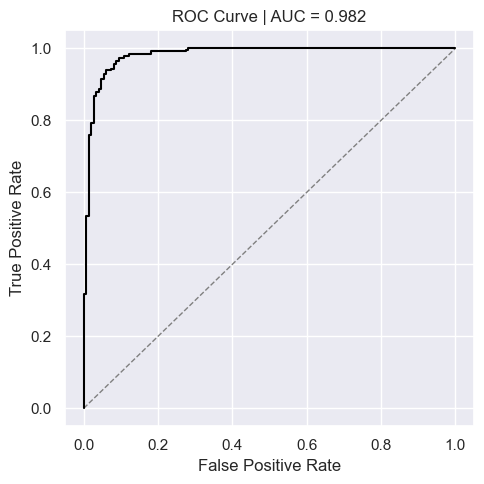

In [12]:
report.model_report('LinearC(l1)').train_report().plot_roc_curve()

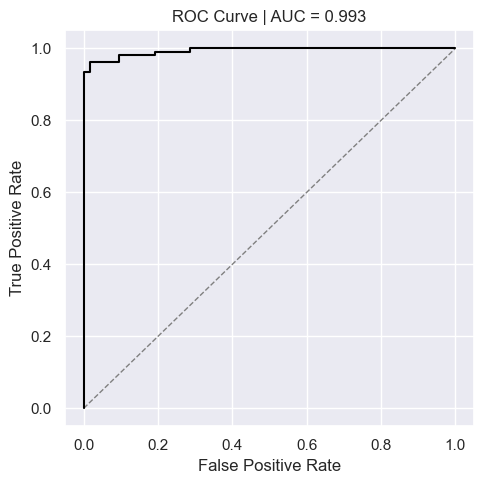

In [13]:
report.model_report('LinearC(l1)').test_report().plot_roc_curve()